<a href="https://colab.research.google.com/github/brentvblake/mammography-DL-masking-level-classifier/blob/main/Copy_of_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Specify the path to the zipped file in Google Drive
zip_file_path = '/content/drive/MyDrive/Final Project/train.zip'

#Specify the path to the processed images
processed_images_dir = '/content/drive/MyDrive/Final Project/Processed Images'

# Specify the directory to extract the contents
extract_path = '/content/data/'

#if processed images path exists
if not os.path.exists(processed_images_dir) or len(os.listdir(processed_images_dir)) < 99999:
  # Create the directory if it doesn't exist
  !mkdir -p "$extract_path"

  # Unzip the file
  !unzip -q "$zip_file_path" -d "$extract_path"

  # copy metadata.jsonl to drive
  !cp /content/data/metadata.jsonl /content/drive/MyDrive/Final Project/
else:
  print("Processed images directory already exists and is fully populated")


In [4]:
#read jsonl file
df = pd.read_json('./content/drive/MyDrive/Final Project/metadata.jsonl', lines=True)


df.head()

,file_name,text_prompt
0,train/sample_0.png,Low masking level
1,train/sample_1.png,Low masking level
2,train/sample_2.png,Low masking level
3,train/sample_3.png,Low masking level
4,train/sample_4.png,Low masking level


In [5]:
#convert text prompt to 0,1,2 instead of Low, Medium, High respectively
df['text_prompt'] = df['text_prompt'].map({'Low masking level': 0, 'Medium masking level': 1, 'High masking level': 2})

df.head()

,file_name,text_prompt
0,train/sample_0.png,0
1,train/sample_1.png,0
2,train/sample_2.png,0
3,train/sample_3.png,0
4,train/sample_4.png,0


In [6]:
from PIL import Image
from IPython.display import clear_output
import os

# Create the processed_images directory if it doesn't exist
processed_images_dir = '/content/drive/MyDrive/Final Project/Processed Images'
os.makedirs(processed_images_dir, exist_ok=True)

images = []
for i in range(99999):
    #if processed image doesnt exist
    if not os.path.exists(os.path.join(processed_images_dir, 'processed_sample_' + str(i) + '.png')):


      img = Image.open('/content/data/train/sample_' + str(i) + '.png')
      img = img.resize((256, 320))  # half image size
      img = img.convert('L')  # convert to grayscale
      img = np.array(img)

      # Save processed image to processed_images directory
      processed_image_path = os.path.join(processed_images_dir, 'processed_sample_' + str(i) + '.png')
      Image.fromarray(img).save(processed_image_path)
      print("Image " + str(i) + " processed and saved at " + processed_image_path)

    #if processed image already exists
    else:
      img = Image.open(os.path.join(processed_images_dir, 'processed_sample_' + str(i) + '.png'))
      img = img.convert('L')  # convert to grayscale
      img = np.array(img)
      print("Image " + str(i) + " already processed and loaded from " + os.path.join(processed_images_dir, 'processed_sample_' + str(i) + '.png'))
    images.append(img)



Image 99900 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99900.png
Image 99901 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99901.png
Image 99902 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99902.png
Image 99903 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99903.png
Image 99904 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99904.png
Image 99905 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99905.png
Image 99906 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99906.png
Image 99907 processed and saved at /content/drive/MyDrive/Final Project/Processed Images/processed_sample_99907.png
Image 99908 processed and saved at /content/drive/MyDrive/Final Project/

In [7]:
import matplotlib.pyplot as plt



(320, 256)


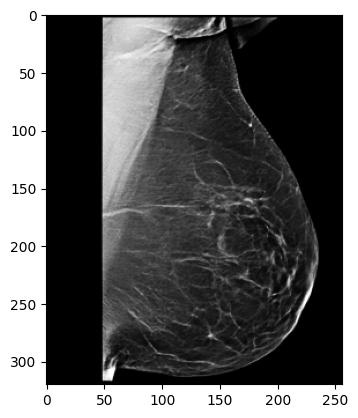

In [8]:
print(images[0].shape)
#are the images loaded correctly?
plt.imshow(images[0], cmap='gray')

In [9]:
labels = []
#read labels from jsonl file
for i in range(99999):
    labels.append(df['text_prompt'][i])

In [10]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
from tensorflow import keras
from tensorflow.keras import layers


In [12]:
#if model doesnt already exist
if not os.path.exists('/content/drive/MyDrive/Final Project/model_v1'):
  #create model
  inputs = keras.Input(shape=(320,256,1)) #resolution of images
  x = layers.Conv2D(32, 3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(3, activation="softmax")(x) #3 classes
  model = keras.Model(inputs=inputs, outputs=outputs)
  print("Model created")
else:
  #load model
  model = keras.models.load_model('/content/drive/MyDrive/Final Project/model_v1')
  print("Model loaded")


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 318, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 159, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 78, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 60, 128)       73856 

In [14]:
import sklearn

In [15]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
#split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [17]:
#compile model if doesnt exist
if not os.path.exists('/content/drive/MyDrive/Final Project/model_v1'):
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
else:
  print("Model already compiled")

In [18]:
#train model if doesnt already exist
if not os.path.exists('/content/drive/MyDrive/Final Project/model_v1'):
  model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=64, validation_data=(np.array(X_val), np.array(y_val)))
  print("Model trained")
else:
  print("Model already trained")
  #print the training data
  print(model.history.history)

Epoch 1/5
938/938 [==============================] - 138s 138ms/step - loss: 1.3421 - accuracy: 0.9634 - val_loss: 0.0987 - val_accuracy: 0.9751
Epoch 2/5
938/938 [==============================] - 126s 134ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0539 - val_accuracy: 0.9848
Epoch 3/5
938/938 [==============================] - 127s 135ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0447 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 127s 135ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0660 - val_accuracy: 0.9826
Epoch 5/5
938/938 [==============================] - 126s 135ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0589 - val_accuracy: 0.9887


In [24]:
#save the trained model to google drive if doesnt already exist
#V1-5epochs-64batchSize-adam
if not os.path.exists('/content/drive/MyDrive/Final Project/model_v1'):
  model.save('/content/drive/MyDrive/Final Project/model_v1')
else:
  print("Model already exists")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model already exists


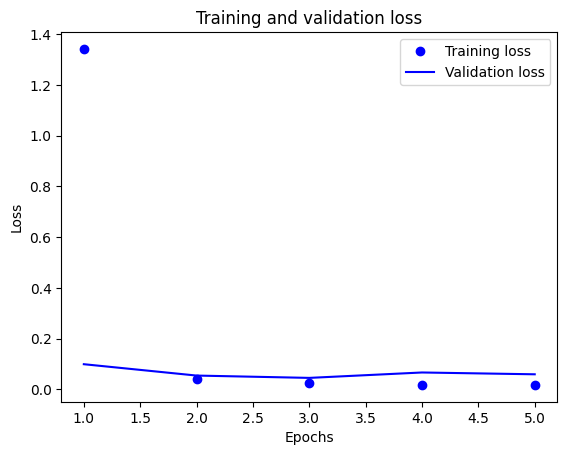

In [25]:
#show graph of training loss and validation loss
history_dict = model.history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

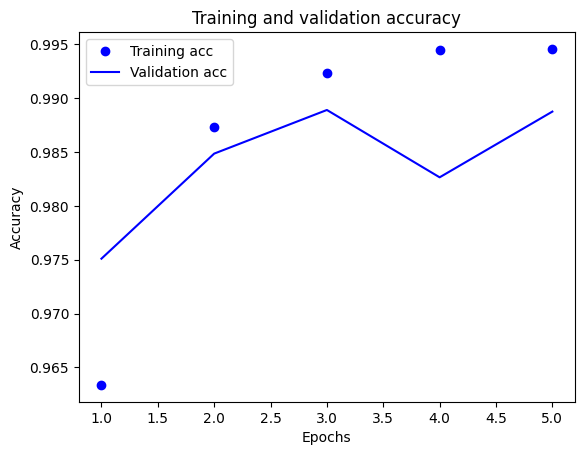

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
#evaluate v1 model
results = model.evaluate(np.array(X_test), np.array(y_test))
results





625/625 [==============================] - 11s 18ms/step - loss: 0.0580 - accuracy: 0.9880


[0.058001190423965454, 0.9879500269889832]